# DDI Baseline

Authors:
*   Esteve Valls Mascaró
*   Julio González López




IN ORDER TO PROCEED WITH THE CODE YOU NEED TO LOAD INTO THE COLAB NOTEBOOK THE FILES PLACED INSIDE /files/

## Load Json Files

In [1]:
classes = ["advise", "effect", "int", "mechanism", "null"]

In [2]:
import json
def loadData(class_):
  path ="/content/drive/MyDrive/MATT/AHLT/"+class_+".json"
  with open(path) as json_file:
    data = json.load(json_file)
    return data

In [3]:
DDI_info = {}
for c in classes:
  DDI_info[c] = loadData(c)

In [20]:
with open("/content/drive/MyDrive/MATT/AHLT/clues.json") as json_file:
  Clues = json.load(json_file)


### Exploratory Data Analysis

In [5]:
def checkInterctions(map):
    interactions = {}
    for type1, values in map.items():
        for tok, num in values.items():
            for type2 in map.keys():
                if type1 is not type2:
                    if tok in map[type2]:
                        if tok not in interactions:
                            interactions[tok] = []
                        if (str(type1)+"-"+str(num)) not in interactions[tok]:
                          interactions[tok].append(str(type1)+"-"+str(num))
    return interactions

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

def searchClues(info_DDI, key = "clue_words", how_many=15):
    clue_words = {}
    for class_, info in info_DDI.items():
        if class_ not in clue_words:
            clue_words[class_] = {}
        clue_words[class_] = info[key]
    a = pd.DataFrame.from_dict(clue_words)

    def cut(dict):
        ks = list(dict.keys())[:how_many]
        map = {}
        for k in ks:
            map[k]=dict[k]
        return map

    for class_ in list(info_DDI.keys()):
        clue_words[class_] = cut(a[class_].sort_values(ascending=False).dropna().to_dict())

    interactions = checkInterctions(clue_words)
    return clue_words, interactions

def plot(data, title = "Clues Analysis"):
    a = pd.DataFrame.from_dict(data)

    fig = a.plot.bar()
    plt.title(title, fontsize=20)
    plt.ylabel('Number of Interactions', fontsize=18)
    plt.xlabel(title, fontsize=16)
    plt.savefig(title+'.jpg')
    plt.show()



In [7]:
clue_words, interactions = searchClues(DDI_info, key="clue_words")

In [8]:
pd.DataFrame.from_dict(clue_words)

,advise,effect,int,mechanism,null
administered,106.0,89.0,NaN,NaN,NaN
e.g.,92.0,93.0,105.0,58.0,1401.0
patients,90.0,NaN,NaN,NaN,NaN
drugs,80.0,189.0,50.0,75.0,2730.0
used,71.0,NaN,NaN,NaN,NaN
inhibitors,66.0,NaN,40.0,58.0,2364.0
receiving,58.0,NaN,NaN,NaN,NaN
including,51.0,82.0,NaN,NaN,NaN
concomitantly,48.0,NaN,NaN,NaN,NaN
antidepressants,44.0,NaN,NaN,NaN,NaN


In [9]:
clues = {}
for class_ in classes:
  if class_!="null":
    clues[class_] = clue_words[class_]

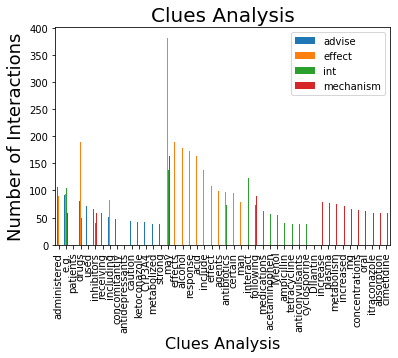

In [10]:
plot(clues, title="Clues Analysis")

#### Lot of words

In [11]:
words, inter = searchClues(DDI_info, key="clue_words", how_many=50)

In [12]:
a = pd.DataFrame.from_dict(words)
a

,advise,effect,int,mechanism,null
administered,106.0,89.0,NaN,48.0,NaN
e.g.,92.0,93.0,105.0,58.0,1401.0
patients,90.0,NaN,NaN,NaN,NaN
drugs,80.0,189.0,50.0,75.0,2730.0
used,71.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
diflunisal,NaN,NaN,NaN,NaN,616.0
dietary,NaN,NaN,NaN,NaN,610.0
deficiencies,NaN,NaN,NaN,NaN,608.0
midazolam,NaN,NaN,NaN,NaN,606.0


In [13]:
inter

{'acid': ['effect-164.0', 'null-3168.0'],
 'administered': ['advise-106.0', 'effect-89.0', 'mechanism-48.0'],
 'agents': ['advise-24.0', 'effect-99.0'],
 'anesthetics': ['effect-69.0', 'null-953.0'],
 'antibiotics': ['effect-97.0', 'int-74.0'],
 'antidepressants': ['advise-44.0', 'int-21.0'],
 'blood': ['effect-45.0', 'null-812.0'],
 'certain': ['advise-38.0', 'effect-96.0', 'int-34.0'],
 'cimetidine': ['mechanism-58.0', 'null-678.0'],
 'clarithromycin': ['advise-30.0', 'mechanism-35.0'],
 'clofibrate': ['effect-46.0', 'int-25.0', 'null-995.0'],
 'concomitantly': ['advise-48.0', 'effect-78.0'],
 'diazepam': ['mechanism-49.0', 'null-616.0'],
 'drugs': ['advise-80.0',
  'effect-189.0',
  'int-50.0',
  'mechanism-75.0',
  'null-2730.0'],
 'e.g.': ['advise-92.0',
  'effect-93.0',
  'int-105.0',
  'mechanism-58.0',
  'null-1401.0'],
 'eg': ['advise-15.0', 'effect-49.0'],
 'erythromycin': ['advise-15.0', 'mechanism-43.0'],
 'following': ['advise-18.0', 'int-73.0', 'mechanism-90.0'],
 'includ

## Test the effect of choosing one word

In [14]:
word_to_check = 'response'
dict_to_check = 'e1_under' # clue_words, sentence_words, e1_under, e2_under

for t in ['effect', 'mechanism', 'int', 'advise', 'null']:
    print('--------------------')
    print(t)
    if word_to_check in DDI_info[t][dict_to_check]:
        print(DDI_info[t][dict_to_check][word_to_check])
    else:
        print(0)
    print(DDI_info[t]['total'])

--------------------
effect
87
1450
--------------------
mechanism
0
1020
--------------------
int
0
231
--------------------
advise
0
697
--------------------
null
40
19750


In [15]:
def check_word(word_to_check, dict_to_check = "clue_words"):
  print("| "+ word_to_check+" |")
  for t in classes:
    print('--------------------')
    print(t)
    if word_to_check in DDI_info[t][dict_to_check]:
        print(DDI_info[t][dict_to_check][word_to_check])
    else:
        print(0)
    print(DDI_info[t]['total'])

## Check interactions

In [16]:
check_word("concentration", dict_to_check="e1_under")

| concentration |
--------------------
advise
9
697
--------------------
effect
5
1450
--------------------
int
0
231
--------------------
mechanism
125
1020
--------------------
null
363
19750


## Check Stadistics

In [17]:
for t in classes:
    print('-----------------------------------------------')
    print("TYPE", t)
    print("Clue_words")
    total = DDI_info[t]["total"]
    print(sorted(DDI_info[t]['clue_words'].items(), key=lambda item: item[1], reverse=True)[0:20])
    print("Words in sentence")
    print(sorted(DDI_info[t]['sentence_words'].items(), key=lambda item: item[1], reverse=True)[0:20])
    print("E1 under")
    print(sorted(DDI_info[t]['e1_under'].items(), key=lambda item: item[1], reverse=True)[0:20])
    print("E2 under")
    print(sorted(DDI_info[t]['e2_under'].items(), key=lambda item: item[1], reverse=True)[0:20])
    print("e1_e2_under_same_verb", DDI_info[t]['e1_e2_under_same_verb'], DDI_info[t]['e1_e2_under_same_verb']/total*100, '%')
    print("e1_under_e2", DDI_info[t]['e1_under_e2'], DDI_info[t]['e1_under_e2']/total*100, '%')
    print("e2_under_e1", DDI_info[t]['e2_under_e1'], DDI_info[t]['e2_under_e1']/total*100, '%')
    print("total", total)
    print('-----------------------------------------------')

-----------------------------------------------
TYPE advise
Clue_words
[('administered', 106), ('e.g.', 92), ('patients', 90), ('drugs', 80), ('used', 71), ('inhibitors', 66), ('receiving', 58), ('including', 51), ('concomitantly', 48), ('antidepressants', 44), ('caution', 43), ('CYP3A4', 42), ('ketoconazole', 42), ('metabolized', 39), ('strong', 38), ('certain', 38), ('therapy', 34), ('concurrently', 31), ('clarithromycin', 30), ('dose', 28)]
Words in sentence
[('patients', 156), ('e.g.', 148), ('used', 124), ('drugs', 124), ('administered', 121), ('caution', 119), ('dose', 115), ('may', 106), ('inhibitors', 104), ('receiving', 85), ('CYP3A4', 84), ('ketoconazole', 81), ('Therefore', 76), ('recommended', 75), ('therapy', 73), ('concomitantly', 70), ('concomitant', 68), ('agents', 67), ('administration', 65), ('use', 62)]
E1 under
[('', 248), ('administer', 99), ('use', 86), ('administration', 56), ('receive', 35), ('dose', 34), ('take', 33), ('co-administration', 33), ('ketoconazole',

## Check with Clues


In [31]:
Data = pd.DataFrame.from_dict(Clues)
Data = Data.T
Data

,error,parent1,parent2,is_under,tag,type
DDI-MedLine.d78.s1.p0,False,class,class,False,n,null
DDI-MedLine.d78.s2.p0,False,agent,norfloxacin,False,None,null
DDI-MedLine.d78.s2.p1,False,agent,norfloxacin,False,None,null
DDI-MedLine.d78.s2.p2,False,agent,norfloxacin,False,None,null
DDI-MedLine.d78.s2.p3,False,agent,norfloxacin,False,None,null
...,...,...,...,...,...,...
DDI-DrugBank.d324.s35.p4,False,dose,dose,False,None,null
DDI-DrugBank.d324.s35.p5,False,pharmacokinetic,dose,False,None,null
DDI-DrugBank.d324.s36.p0,False,alter,know,False,None,null
DDI-DrugBank.d324.s37.p0,False,interaction,zaleplon,False,None,int


In [33]:
parent1 = Data["parent1"][Data["type"] == "null"]

In [38]:
info = {}
for p in parent1.to_numpy():
    if p not in info:
      info[p]=0
    info[p]+=1

In [41]:
classes = ['advise', 'effect', 'int', 'mechanism', 'null']
def getMostTypical(data, type_="parent1"):
  info = {}
  for c in classes:
    info[c] = {}
    parent1 = data[type_][data["type"] == c]
    for p in parent1.to_numpy():
        if p not in info[c]:
          info[c][p]=0
        info[c][p]+=1
  return info

In [43]:
parent1_typical = getMostTypical(Data, "parent1")

In [46]:
import pandas as pd
from matplotlib import pyplot as plt

def search(info_DDI, how_many=15):
    a = pd.DataFrame.from_dict(info_DDI)

    def cut(dict):
        ks = list(dict.keys())[:how_many]
        map = {}
        for k in ks:
            map[k]=dict[k]
        return map

    for class_ in list(info_DDI.keys()):
        clue_words[class_] = cut(a[class_].sort_values(ascending=False).dropna().to_dict())

    interactions = checkInterctions(clue_words)
    return clue_words, interactions

def plot(data, title = "Clues Analysis"):
    a = pd.DataFrame.from_dict(data)

    fig = a.plot.bar()
    plt.title(title, fontsize=20)
    plt.ylabel('Number of Interactions', fontsize=18)
    plt.xlabel(title, fontsize=16)
    plt.savefig(title+'.jpg')
    plt.show()



In [ ]:
cut_15, interactions = search(parent1_typical)

In [51]:
cut_15.pop("null")

{'Acetaminophen': 946.0,
 'Acetazolamide': 300.0,
 None: 1041.0,
 'acetaminophen': 300.0,
 'administer': 287.0,
 'administration': 407.0,
 'alcohol': 1551.0,
 'ampicillin': 224.0,
 'dose': 213.0,
 'drug': 220.0,
 'effect': 340.0,
 'inhibitor': 266.0,
 'intake': 218.0,
 'steroid': 222.0,
 'use': 511.0}

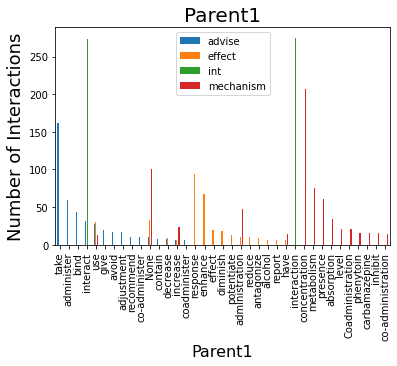

In [55]:
plot(cut_15, title = "Parent1")

## Do with all

In [59]:
list(Data.keys())

['error', 'parent1', 'parent2', 'is_under', 'tag', 'type']

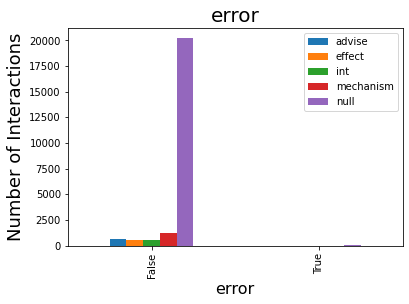

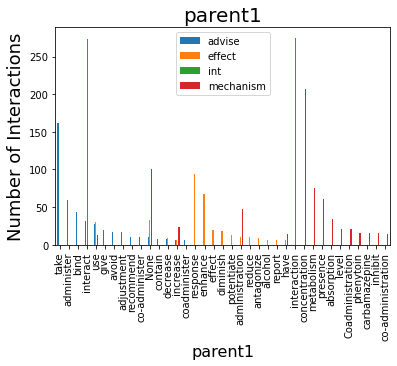

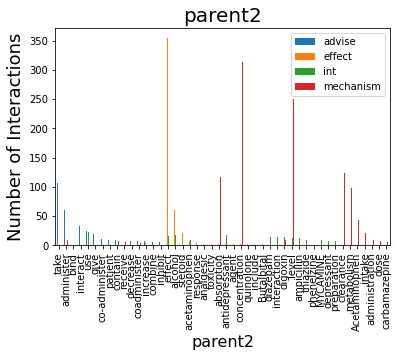

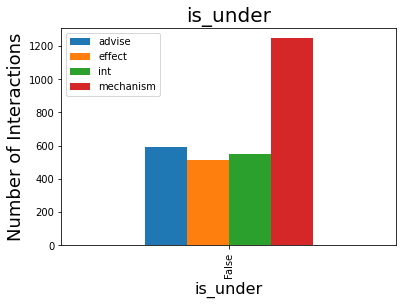

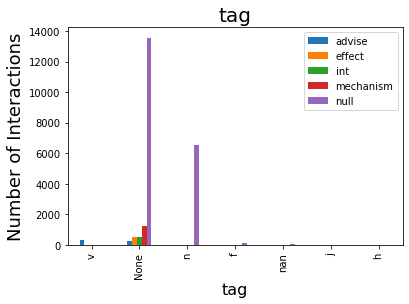

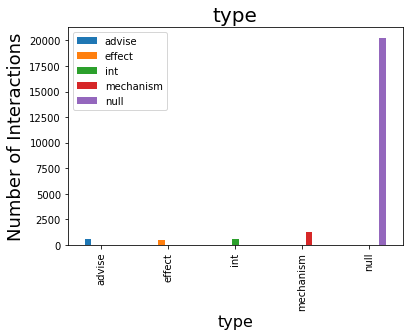

In [63]:
for k in Data.keys():
  parent1_typical = getMostTypical(Data, k)
  cut_15, interactions = search(parent1_typical)
  if k not in ["error", "tag", "type"]:
      cut_15.pop("null")
  plot(cut_15, title = k)